In [1]:
# pip install panda -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv('train.csv')
data.head()

#確認遺失值數量
data.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

| 欄位名稱       | 中文名稱         | 遺失值數量 |
|----------------|------------------|------------|
| PassengerId    | 乘客編號         | 0          |
| Survived       | 是否存活         | 0          |
| Pclass         | 艙等             | 0          |
| Name           | 姓名             | 0          |
| Sex            | 性別             | 0          |
| Age            | 年齡             | 177        |
| SibSp          | 兄弟姐妹/配偶數  | 0          |
| Parch          | 父母/子女數量    | 0          |
| Ticket         | 車票號碼         | 0          |
| Fare           | 車票價格         | 0          |
| Cabin          | 客艙號碼         | 687        |
| Embarked       | 登船港口         | 2          |

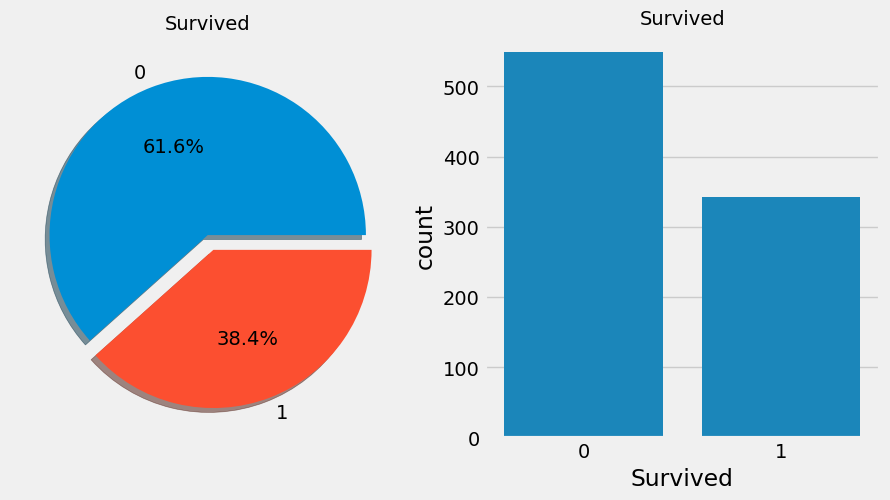

In [4]:
# How many Survived?? 有多少人倖存？
f,ax=plt.subplots(1,2,figsize=(10,5)) #指定畫布大小

'''
	•	explode=[0, 0.1] 使圓餅圖的第二個切片（通常是“未生還”部分）從中心稍微突出。
	•	autopct='%1.1f%%' 在切片上顯示百分比，格式為小數點後一位。
	•	ax=ax[0] 指定將圖形繪製在第一個子圖(ax[0]）上。
	•	shadow=True 添加陰影效果。
'''
Survived = data['Survived'].value_counts() #計算 Survived 列中各個值的出現次數
Survived.plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived' ,fontsize=14) #圖表名稱
ax[0].set_ylabel('') #把y軸變空（隱藏）

'''
	•	計算 Survived 列中各個值的計數（即每個值的出現次數）。
	•	x='Survived' 指定將 Survived 列作為 x 軸。
	•	data=data 指定資料集來源。
	•	ax=ax[1] 指定將圖形繪製在第二個子圖（ax[1]）上。
'''
sns.countplot(x='Survived',data=data,ax=ax[1])
ax[1].set_title('Survived' ,fontsize=14)
plt.show()

In [5]:
# 性別與生存與否列連表
data.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

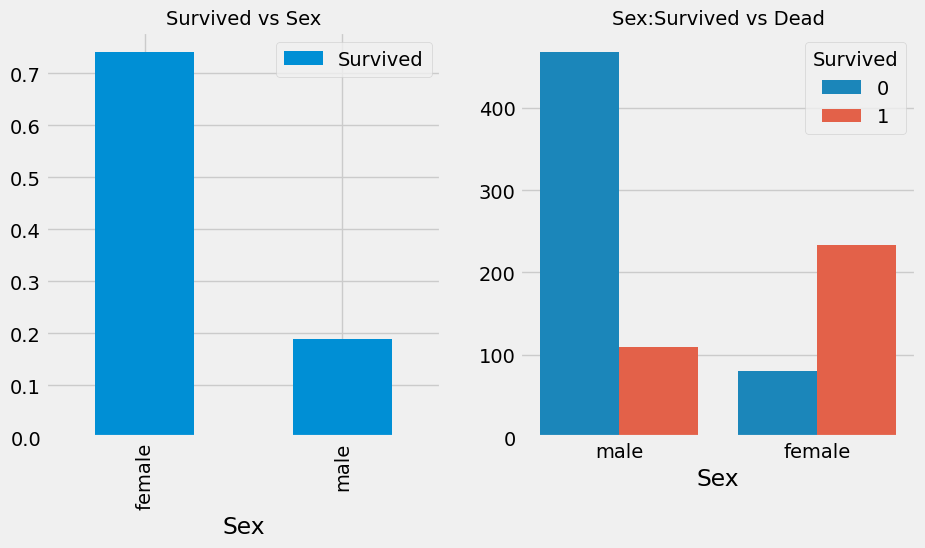

In [6]:
f,ax = plt.subplots(1,2 ,figsize = (10,5))
data[['Sex','Survived']].groupby('Sex').mean().plot.bar(ax = ax[0]) #計算性別平均生存情形
ax[0].set_title('Survived vs Sex' ,fontsize=14)
sns.countplot(x='Sex', hue='Survived', data=data, ax=ax[1] ) #計算不同性別生存人數
ax[1].set_ylabel('')
ax[1].set_title('Sex:Survived vs Dead' ,fontsize=14)
plt.show()

In [7]:
#計算Ｐclass和survived變量的關係
# 顯示兩個或多個分類變量之間的頻率分佈
pd.crosstab(data.Pclass,data.Survived,margins=True).style.background_gradient(cmap='summer_r')
#style.background_gradient() 是 Pandas 中用來為 DataFrame 中的數值應用顏色漸變效果的方法。
#cmap='summer_r': 這個參數指定了使用反轉的 summer 漸變色調（從綠色到黃色），其中較高的數值會顯示更淺的顏色（接近黃色），較低的數值會顯示更深的顏色（接近綠色）。

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5, 1.0, 'Pclass:Survived vs Dead')

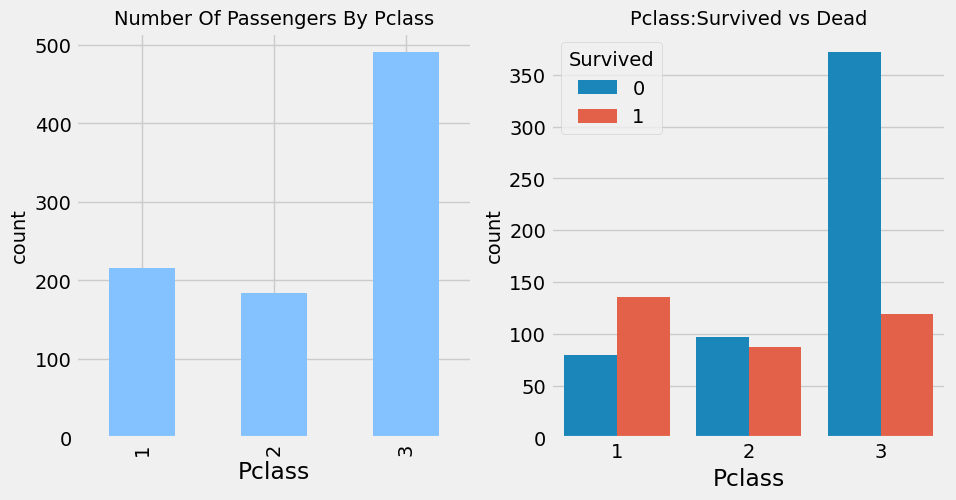

In [8]:
#左圖為各別不同等級的船艙人數
f,ax = plt.subplots(1,2,figsize = (10,5))
data[['Pclass']].groupby('Pclass').value_counts().plot.bar(ax=ax[0],color=['#84C1FF'])
ax[0].set_title('Number Of Passengers By Pclass',fontsize=14)
ax[0].set_ylabel('count',fontsize=14)
# 右圖為各別船艙存活情形
sns.countplot(x='Pclass' ,hue='Survived', data = data, ax=ax[1])
ax[1].set_ylabel('count' ,fontsize=14)
ax[1].set_title('Pclass:Survived vs Dead',fontsize=14)

In [9]:
pd.crosstab([data.Sex,data.Survived],data.Pclass,margins=True).style.background_gradient('summer_r')


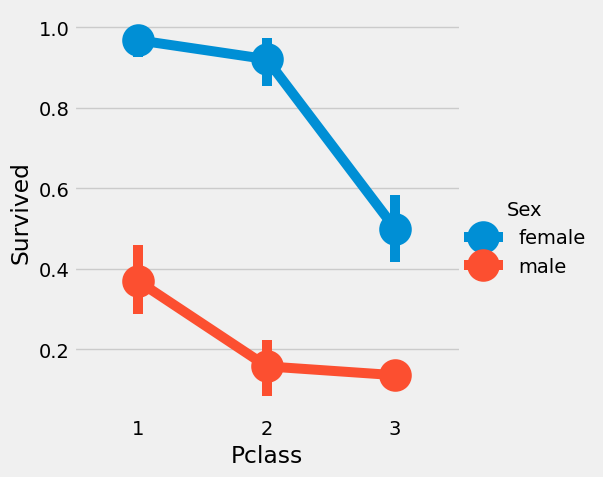

'\nCrossTab和FactorPlot得知，Pclass1女性的生存率約為95-96%，因為Pclass1的94名女性中只有3人死亡，\n很明顯，無論P等級如何，女性在救援時都被優先考慮。即使是 Pclass1 的男性，存活率也非常低。\n'

In [10]:
sns.catplot(x='Pclass',y='Survived',hue='Sex',data=data , kind='point')
plt.show()
'''
CrossTab和FactorPlot得知，Pclass1女性的生存率約為95-96%，因為Pclass1的94名女性中只有3人死亡，
很明顯，無論P等級如何，女性在救援時都被優先考慮。即使是 Pclass1 的男性，存活率也非常低。
'''

In [11]:
# 計算年齡基本統計數
print('最大年齡：',data['Age'].max(),'歲')
print('最小年齡：',data['Age'].min(),'歲')
print('平均年齡：',data['Age'].mean(),'歲')

最大年齡： 80.0 歲
最小年齡： 0.42 歲
平均年齡： 29.69911764705882 歲


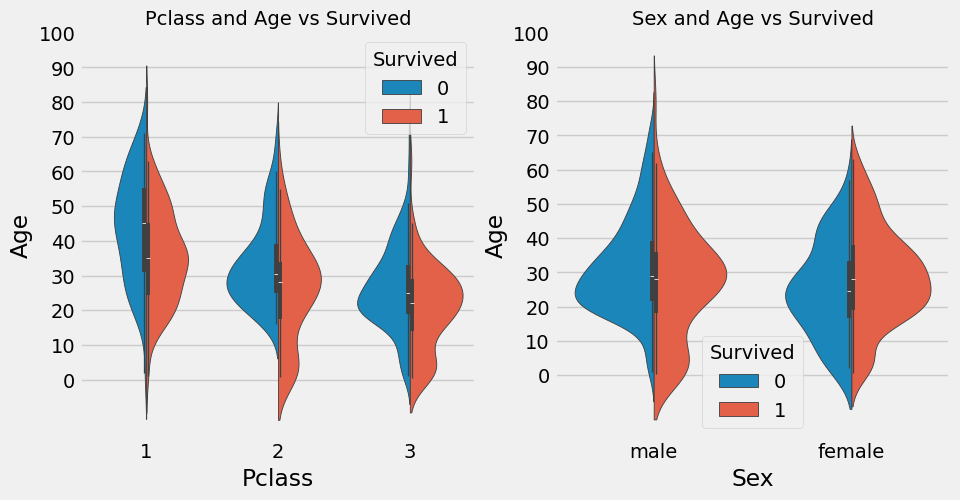

'\n兒童數量隨著 P 艙等的增加而增加，無論 P 艙等如何，10 歲以下乘客（即兒童）的生存率看起來都不錯。\nPclass1 中 20-50 歲的乘客的生存機會很高，女性的生存機會更好。\n對男性來說，生存機會隨著年齡的增長而降低。\n'

In [12]:
f, ax = plt.subplots(1, 2, figsize=(10, 5))

# 第一个小提琴图
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived',fontsize=14)
ax[0].set_yticks(range(0, 110, 10))

# 第二个小提琴图
sns.violinplot(x="Sex", y="Age", hue="Survived", data=data, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived' ,fontsize=14)
ax[1].set_yticks(range(0, 110, 10))
plt.show()

'''
兒童數量隨著 P 艙等的增加而增加，無論 P 艙等如何，10 歲以下乘客（即兒童）的生存率看起來都不錯。
Pclass1 中 20-50 歲的乘客的生存機會很高，女性的生存機會更好。
對男性來說，生存機會隨著年齡的增長而降低。
'''

### NaN 遺失值處理

In [13]:
# Initial = 名字縮寫(用正規表達式來建立新的欄位)
#從名字下手解決年齡遺失值（177個）
data['Initial']=0
data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

In [14]:
# 觀察縮寫個數
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') 
#看起來有些是拼寫錯誤，如 Mlle 或 Mme，代表 Miss

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [15]:
# 把拼寫錯誤的replace改成正確的
# 每個值換成對應的值，例如，'Mlle' 換成 'Miss'，Dr' 換成 'Mr'，inplace=True表示直接寫入在data中，不會另外創建副本
data['Initial'].replace(
    ['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
    ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
    inplace=True
)

In [16]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [17]:
# 還沒更改前年齡還是遺失值(Initial = Master 為例)
master_data = data[(data['Initial'] == 'Master')& (data.Age.isnull())]
master_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Master
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,Master
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,Master


In [18]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Master'),'Age'] = 5 #上面那四筆遺失值用5來取代
data.loc[(data.Age.isnull()) & (data.Initial == 'Miss'),'Age'] = 22
data.loc[(data.Age.isnull()) & (data.Initial == 'Mr'),'Age'] = 33
data.loc[(data.Age.isnull()) & (data.Initial == 'Mrs'),'Age'] = 36
data.loc[(data.Age.isnull()) & (data.Initial == 'Other'),'Age'] = 46

In [19]:
# data.isnull().sum() #確認全部欄位沒有遺失值
data.Age.isnull().any() #確認年齡單一欄位是否有遺失值

np.False_

In [20]:
data['Embarked'].fillna('S',inplace=True)
data.Embarked.isnull().any()

np.False_

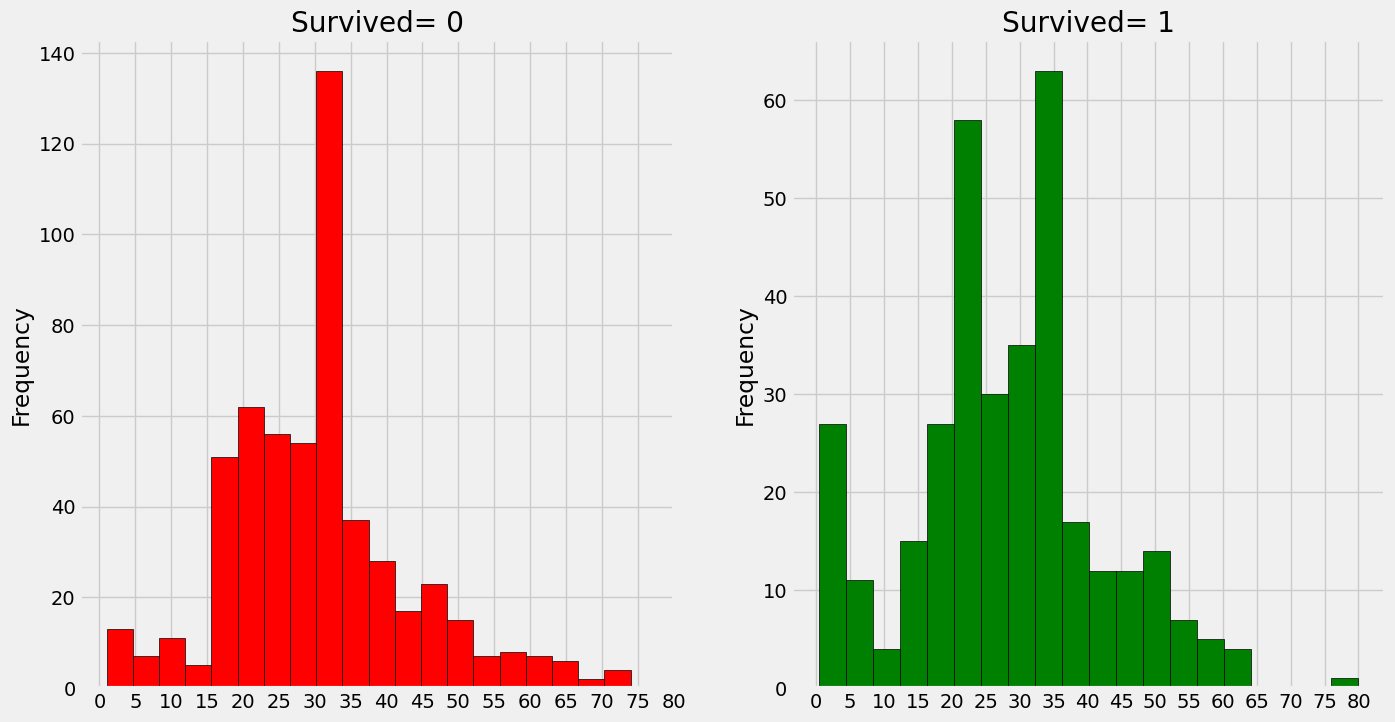

In [21]:
f,ax=plt.subplots(1,2,figsize=(15,8))
''''
•	data[data['Survived'] == 0]：選取 Survived 欄位值為 0（即未生還者）的所有資料。
•	Age.plot.hist(...)：對選取資料的 Age 欄位繪製直方圖。
•	ax=ax[0]：將直方圖繪製在第一個子圖中。
•	bins=20：將年齡數據分成 20 個區間（柱狀）。
•	edgecolor='black'：設定每個柱狀的邊框顏色為黑色。
•	color='red'：設定柱狀的填充顏色為紅色。
'''
# 左圖
data[data['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
# x1 = list(range(0, 85, 5))：創建一個列表，包含從 0 到 80 的數字，每隔 5 個單位一個數值。
x1=list(range(0,85,5))
ax[0].set_xticks(x1)


#右圖
data[data['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

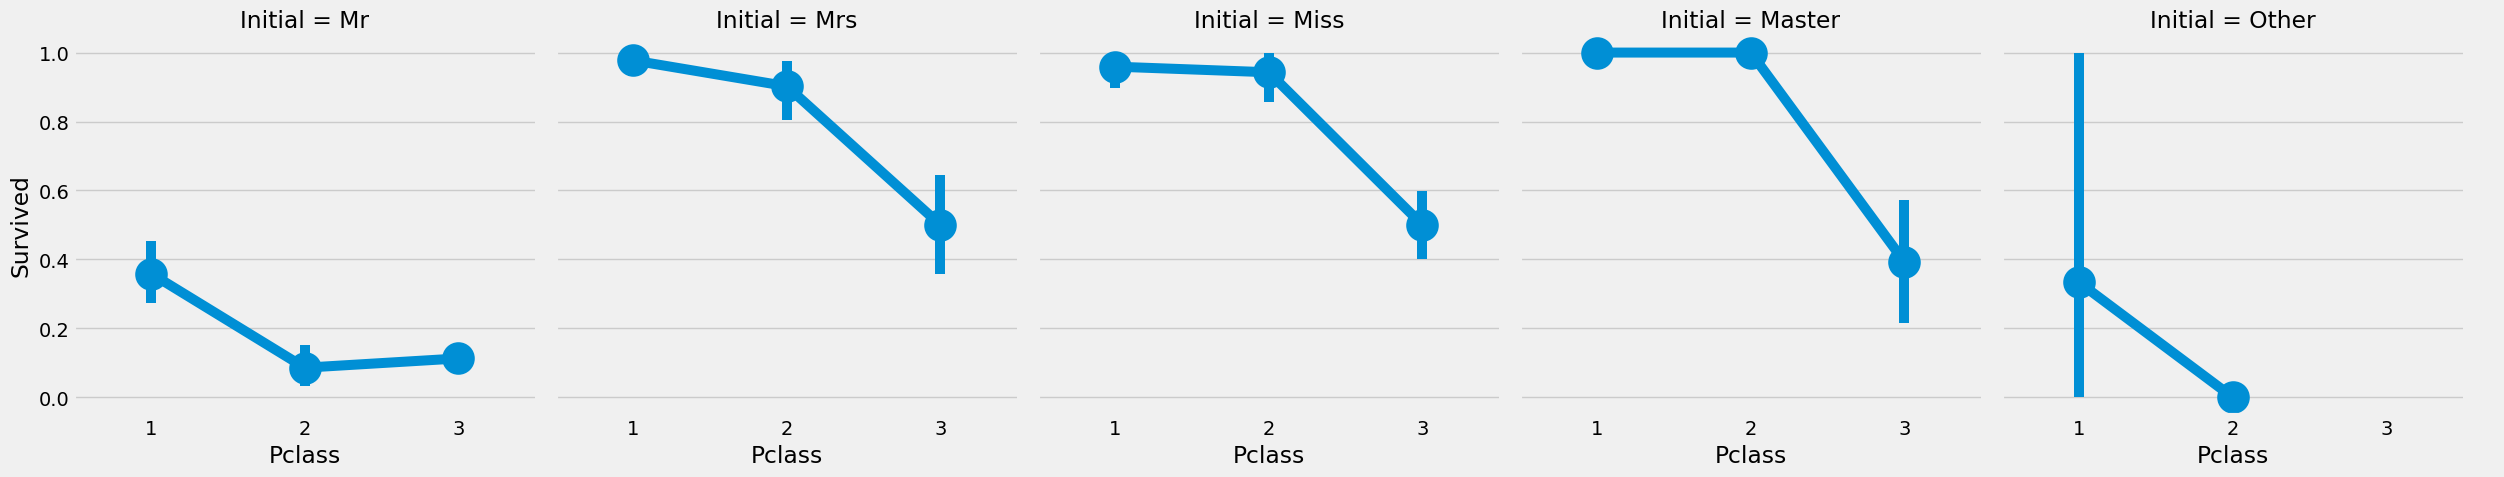

In [22]:
sns.catplot(x='Pclass', y='Survived', col='Initial', data=data, kind='point')

# Show the plot
plt.show()

## 特徵工程和資料清理

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.041709 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.091497 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339582  0.083081  0.018443   
Age             0.041709 -0.091497 -0.339582  1.000000 -0.267734 -0.198712   
SibSp          -0.057527 -0.035322  0.083081 -0.267734  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.198712  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.089087  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.089087  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


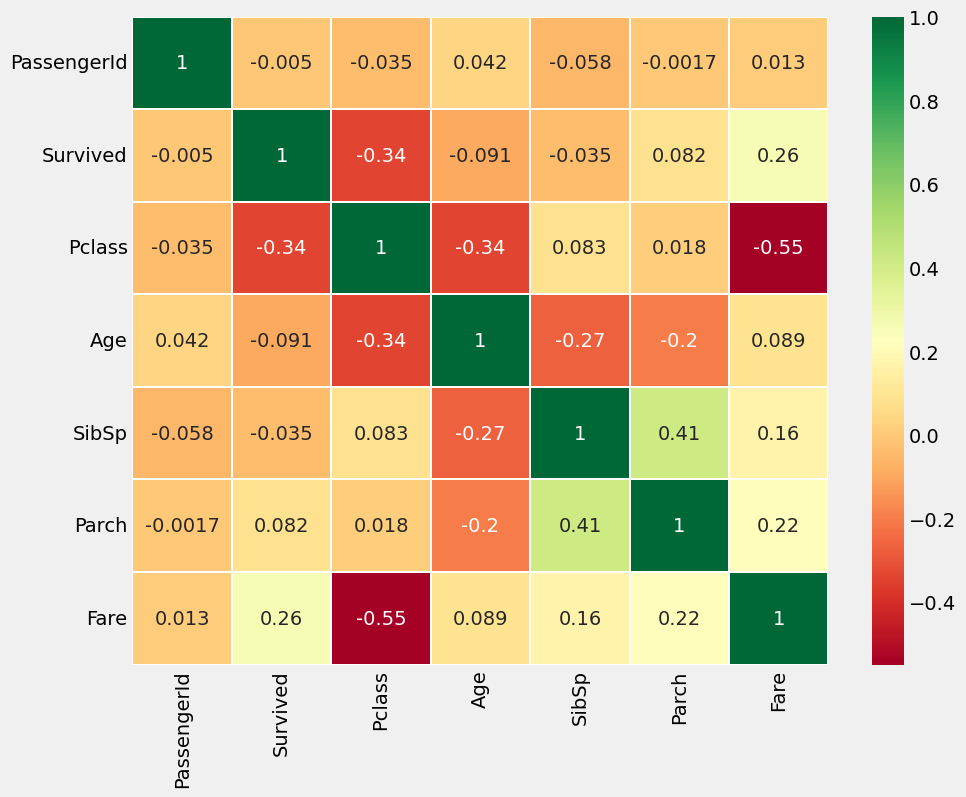

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # 只選取是數值的欄位

# 計算數值型數據的相關係數矩陣
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

# Plot the heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', linewidths=0.2)

# Adjust the figure size
fig = plt.gcf()
fig.set_size_inches(10, 8)

# Show the plot
plt.show()

#無共線性問題，因此所有變數皆可以繼續使用

In [24]:
#將年齡分堆
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [25]:
# 確認每個年齡層人數
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')


,count
Age_band,
1,382
2,325
0,104
3,69
4,11


| 年齡代碼 (`Age_band`) | 年齡範圍 (歲)    | 人數 (`count`) |
|-----------------------|------------------|----------------|
| 0                     | 16 歲及以下      | 104            |
| 1                     | 17 歲至 32 歲    | 382            |
| 2                     | 33 歲至 48 歲    | 325            |
| 3                     | 49 歲至 64 歲    | 69             |
| 4                     | 65 歲以上        | 11             |

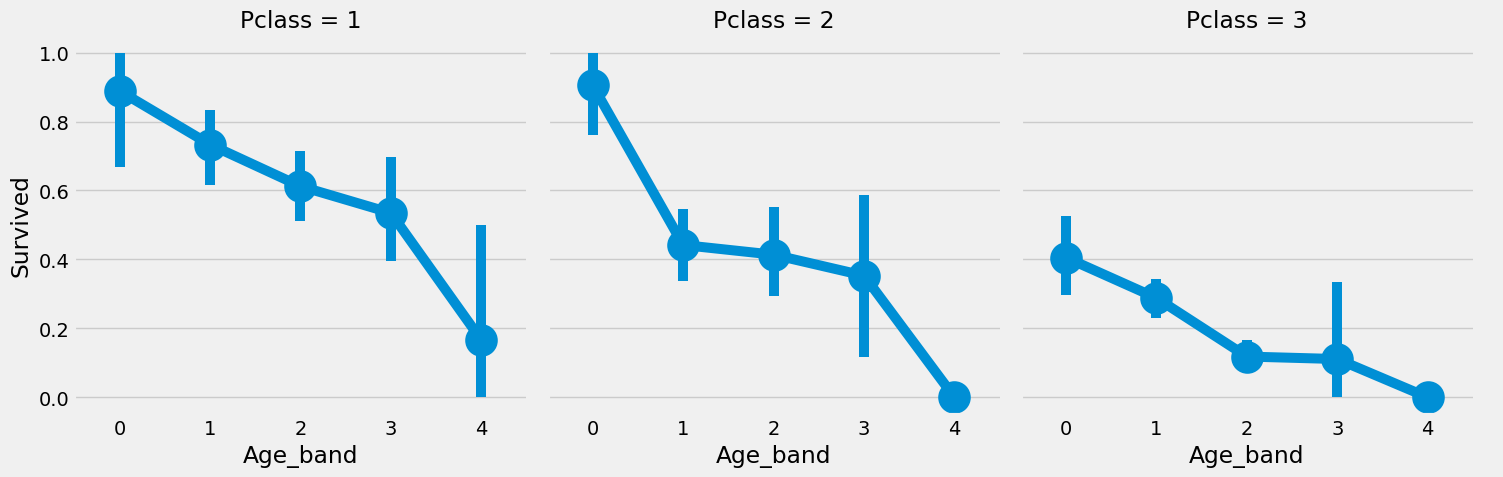

In [26]:
sns.catplot(x='Age_band',y='Survived',data=data,col='Pclass',kind='point')
plt.show()

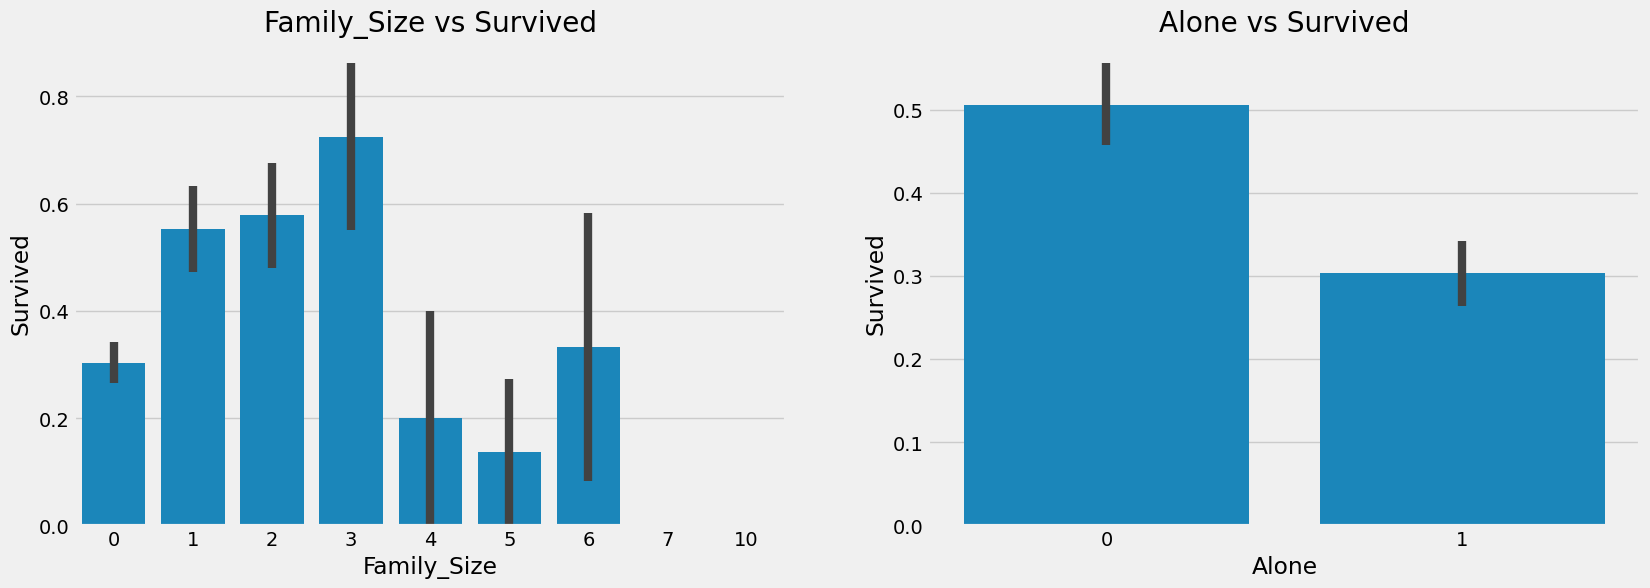

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Parch = 父母/子女數量 
# SibSp = 兄弟姐妹/配偶數
# 建立家庭人數以及獨旅的欄位
data['Family_Size'] = data['Parch'] + data['SibSp']
data['Alone'] = (data['Family_Size'] == 0).astype(int)

# 建立畫布
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# 家庭人數以及生存率
sns.barplot(x='Family_Size', y='Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

# 獨旅以及生存率
sns.barplot(x='Alone', y='Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

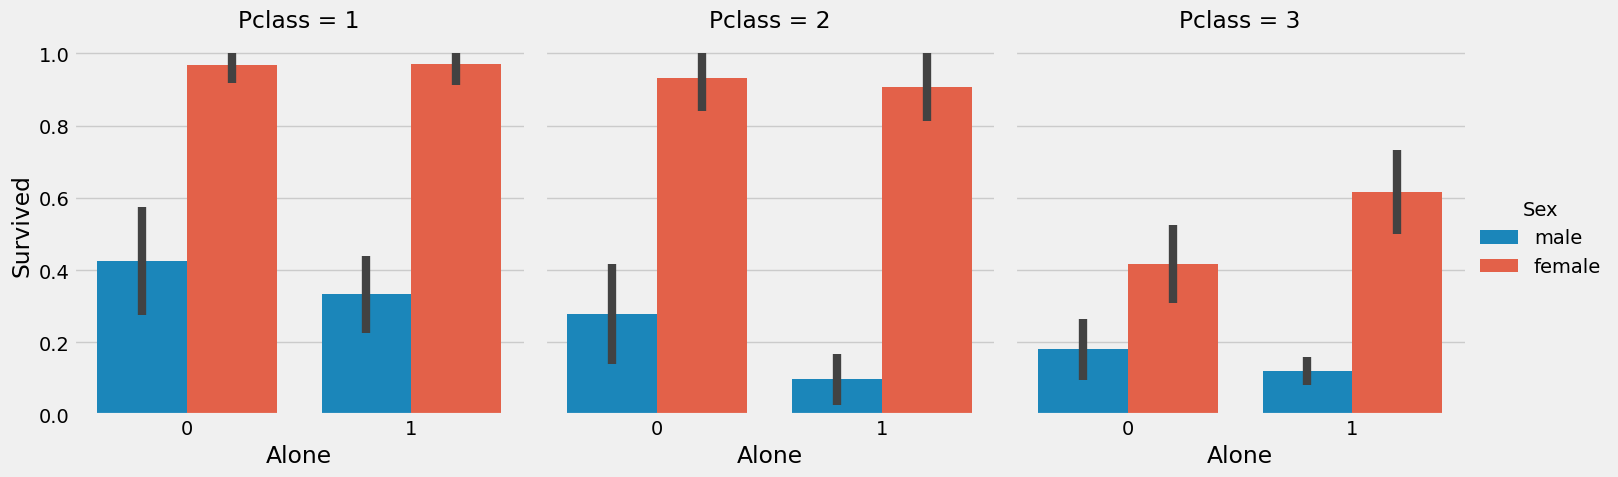

In [28]:

sns.catplot(
    x='Alone',           # X-axis: Alone column
    y='Survived',        # Y-axis: Survived column
    data=data,           # DataFrame
    hue='Sex',           # Color by Sex
    col='Pclass',        # Create separate plots for each Pclass
    kind='bar'           # Use bar plot for categorical data
)

# Show the plot
plt.show()

In [29]:
'''
pd.qcut() 是 pandas 中的一個函數，用於根據分位數將數據分為等量的區間。這裡我們將 Fare 列（票價）劃分為 4 個區間。
'''
data['Fare_Range']=pd.qcut(data['Fare'],4)

data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [30]:
# 將票價範圍分堆
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

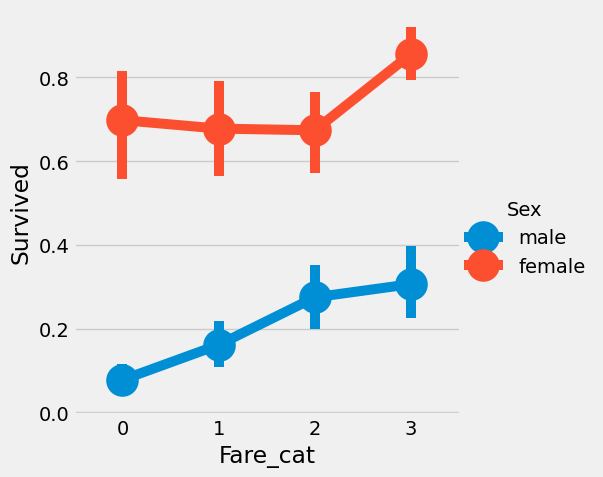

In [31]:
sns.catplot ( x = 'Fare_cat' , y = 'Survived' , data = data , hue = 'Sex' , kind = 'point')
plt.show()
# 隨著 Fare_cat 的增加，生存機會也會增加。該特徵可能會與性別一起成為建模過程中的重要特徵。

##### 將字串資料轉換為數值

In [32]:
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

#### 刪除不需要的特徵
Name--> 我們不需要名稱特徵，因為它無法轉換為任何分類值。

Age--> 我們有 Age_band 功能，所以不需要這個。

Ticket--> 它是任何無法分類的隨機字串。

Fare--> 我們有 Fare_cat 功能，所以不需要

Cabin--> 很多 NaN 值，而且許多乘客有多個客艙。所以這是一個無用的特徵。

Fare_Range--> 我們有 fare_cat 功能。

PassengerId--> 無法分類。

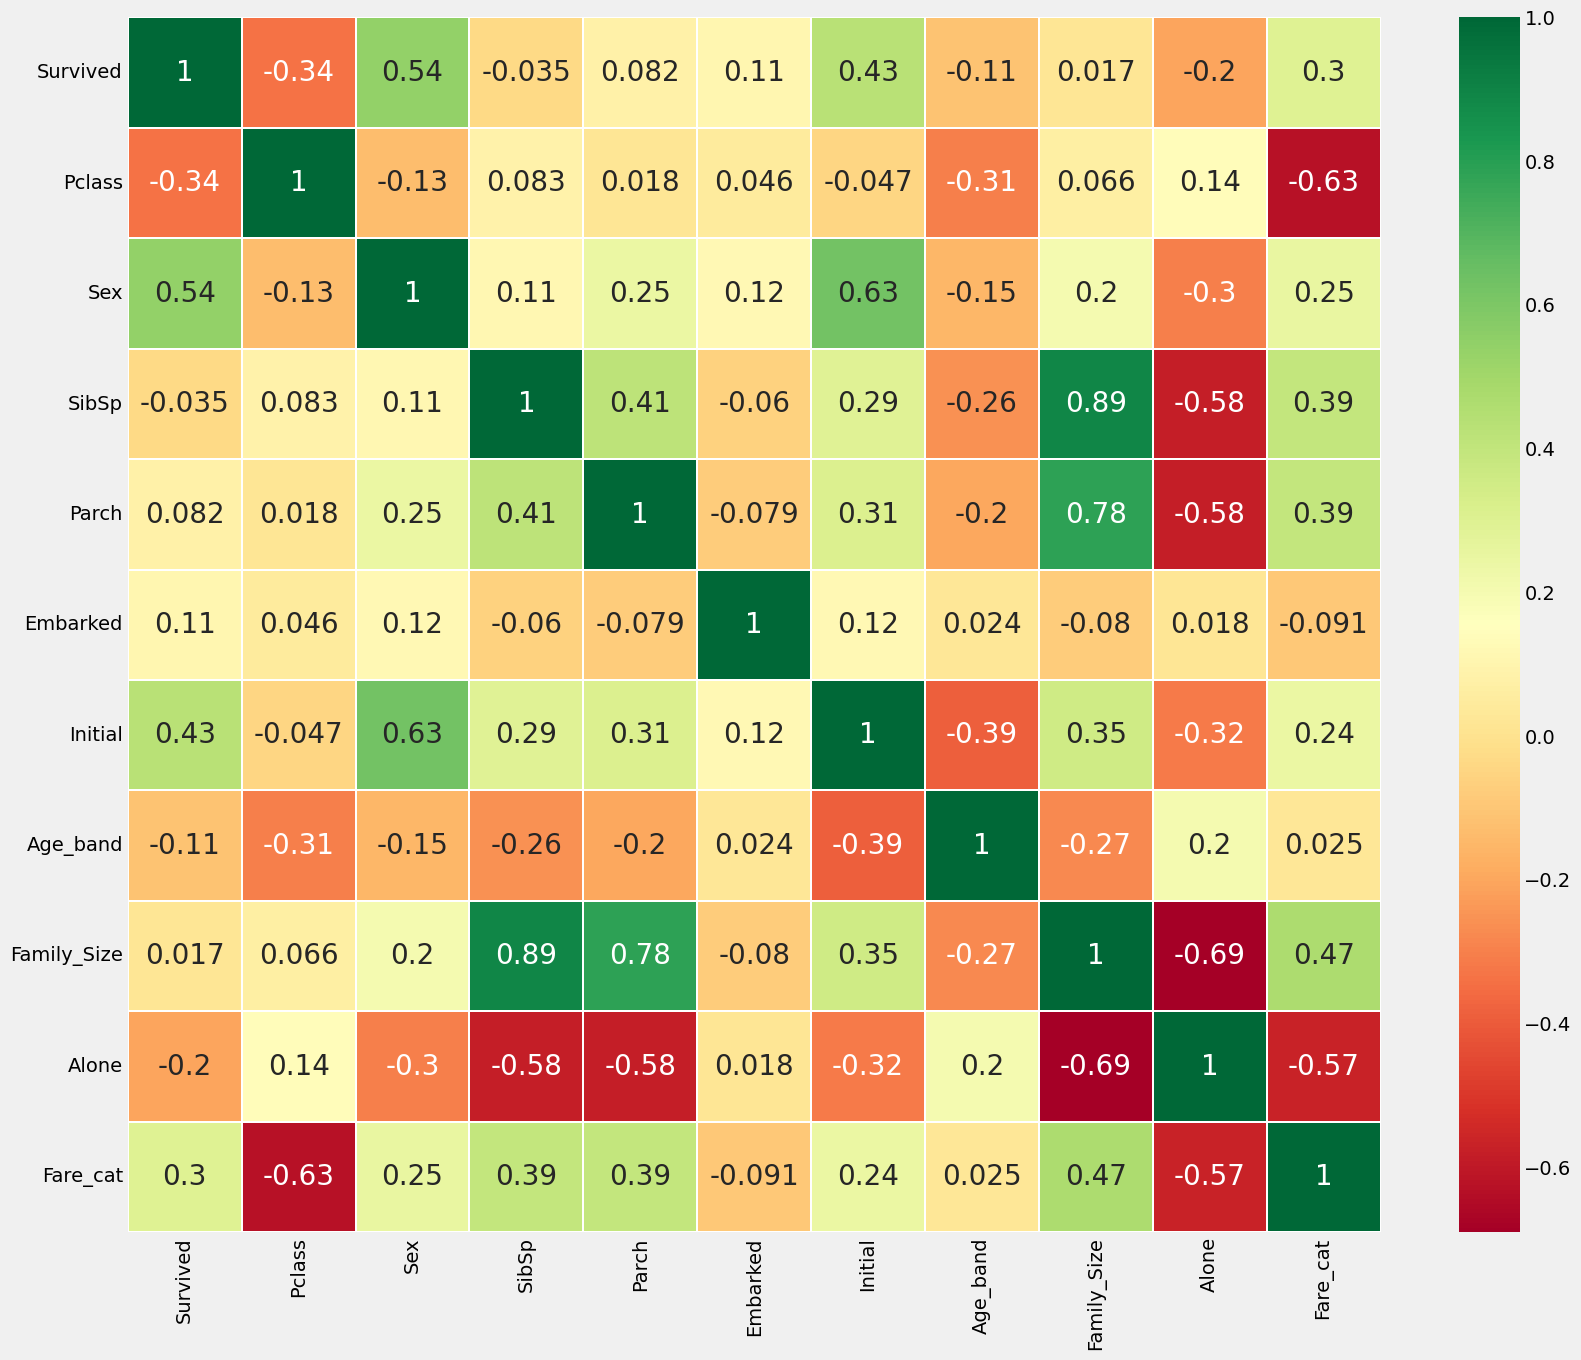

In [33]:
data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [34]:
data.to_csv('clearn_data.csv', index=False, encoding='utf-8')

### 預測建模


In [35]:
pip install scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [36]:

#載入套件
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [37]:
# 切分測試集與訓練集 #stratify=分層抽樣的目的是確保分割後的訓練集和測試集中，Survived的類別分佈與原始數據集中的分佈一致。 
train,test=train_test_split(data,test_size=0.3,random_state=666,stratify=data['Survived'])

# 訓練集資料中，選取除了標題以外的列（不包括第 0 列，第 0 列是標籤）。
train_X=train[train.columns[1:]]
#訓練集資料中，只取第0列（Survived）
train_Y=train[train.columns[:1]]

# 測試集資料中，選取除了標題以外的列（不包括第 0 列，第 0 列是標籤）。
test_X=test[test.columns[1:]]
#測試集資料中，只取第 0 列 (Survived)。
test_Y=test[test.columns[:1]]

#完整數據，除了表頭以外
X=data[data.columns[1:]]

# 完整數據，只保留存活（Survived ）
Y=data['Survived']

In [38]:
# print(test_X)
# print(test_Y)
# print(train_X)
# print(train_Y)

In [39]:
# print(train)
print(test)

     Survived  Pclass  Sex  SibSp  Parch  Embarked  Initial  Age_band  \
279         1       3    1      1      1         0        1         2   
266         0       3    0      4      1         0        0         0   
308         0       2    0      1      0         1        0         1   
339         0       1    0      0      0         0        0         2   
219         0       2    0      0      0         0        0         1   
..        ...     ...  ...    ...    ...       ...      ...       ...   
206         0       3    0      1      0         0        0         1   
380         1       1    1      0      0         1        2         2   
454         0       3    0      0      0         0        0         2   
9           1       2    1      1      0         1        1         0   
785         0       3    0      0      0         0        0         1   

     Family_Size  Alone  Fare_cat  
279            2      0         2  
266            5      0         3  
308            

In [40]:
# print(X)
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [41]:
X.isna().sum()

Pclass         0
Sex            0
SibSp          0
Parch          0
Embarked       0
Initial        0
Age_band       0
Family_Size    0
Alone          0
Fare_cat       0
dtype: int64

### SVM 支援向量機

In [42]:
#rbf 常用於非線性可分支持向量機，具備良好的性能。
model=svm.SVC(kernel='rbf',C=1,gamma=0.1)
model.fit(train_X,train_Y)
prediction1=model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.8171641791044776


In [43]:
#linear 適用於數據線性可分的情況。
model=svm.SVC(kernel='linear',C=0.1)
model.fit(train_X,train_Y)
prediction2=model.predict(test_X)
print('Accuracy for linear SVM is ',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is  0.8059701492537313


根據結果：
	•	RBF SVM 的準確率: 0.8171
	•	Linear SVM 的準確率: 0.8060

這些數據表明，RBF 核略高於線性核，但提升幅度非常有限（約 1.1%）。
結論

	1.數據可能是近似線性可分，但存在一些非線性特徵。
	  如果數據是完全非線性可分，RBF 核的提升幅度應該明顯大於 1.1%。
	2.建議：
	  由於 RBF 核的準確率稍高，可以選擇 RBF 核以獲得更好的結果。
	  若需要簡單、高效的模型，可以考慮線性核，因為準確率差異不大。
	3.若需要進一步確定：
	  可以使用 交叉驗證曲線 或 學習曲線 來檢查數據是否具有更多非線性特徵。
	  測試不同的非線性模型（如多項式核）來評估是否有顯著提升。

### Logistic Regression 邏輯回歸

In [44]:
# 用於解決二元分類問題 ＃死 or 活
model = LogisticRegression()
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.7649253731343284


### Decision Tree 決策樹

In [45]:
model=DecisionTreeClassifier()
model.fit(train_X,train_Y)
prediction4=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.7611940298507462


|--- Sex <= 0.50
|   |--- Pclass <= 1.50
|   |   |--- Age_band <= 0.50
|   |   |   |--- class: 1
|   |   |--- Age_band >  0.50
|   |   |   |--- Fare_cat <= 1.00
|   |   |   |   |--- class: 0
|   |   |   |--- Fare_cat >  1.00
|   |   |   |   |--- Fare_cat <= 2.50
|   |   |   |   |   |--- Embarked <= 0.50
|   |   |   |   |   |   |--- Initial <= 2.00
|   |   |   |   |   |   |   |--- Age_band <= 2.50
|   |   |   |   |   |   |   |   |--- Age_band <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age_band >  1.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- Age_band >  2.50
|   |   |   |   |   |   |   |   |--- Age_band <= 3.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- Age_band >  3.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- Initial >  2.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Embarked >  0.50
|   |

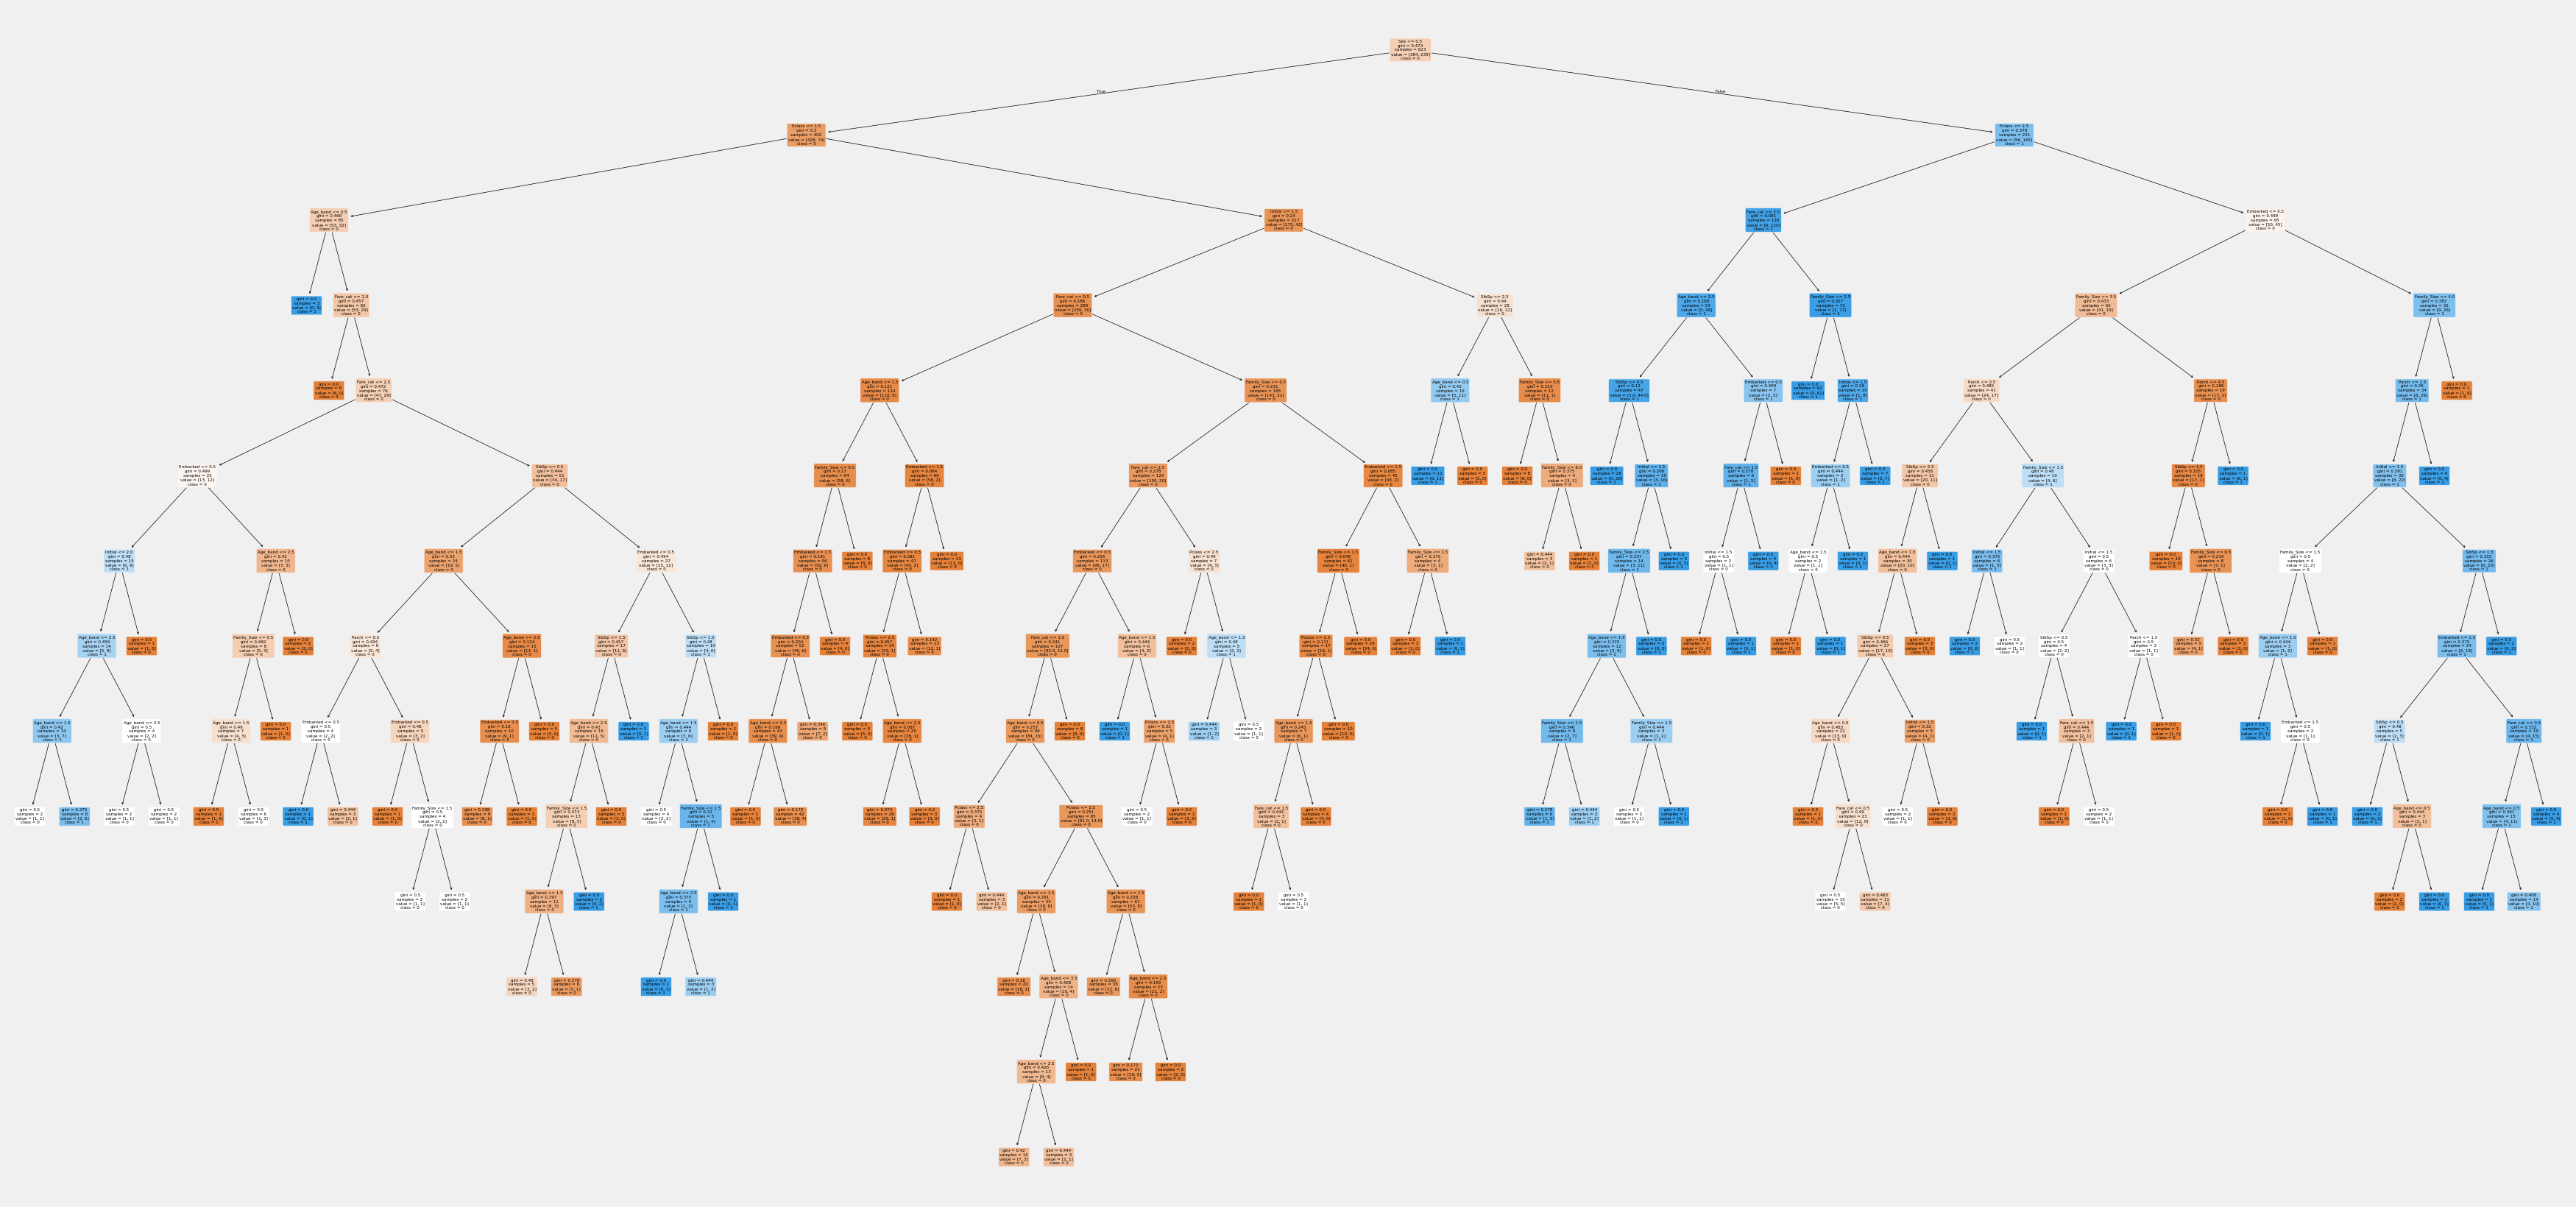

In [46]:
#把決策樹視覺化
from sklearn.tree import export_text, plot_tree

# 文本格式顯示
tree_rules = export_text(model, feature_names=train_X.columns.tolist())
print(tree_rules)

# 圖形顯示
plt.figure(figsize=(40, 20))
plot_tree(model, feature_names=train_X.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.show()

### K-Nearest Neighbours(KNN)

In [47]:
# 監督學習算法，常用於分類和迴歸問題  #適用於多分類問題
model=KNeighborsClassifier() 
model.fit(train_X,train_Y)
prediction5=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))


The accuracy of the KNN is 0.75


##### 測試不同k值的預測好壞

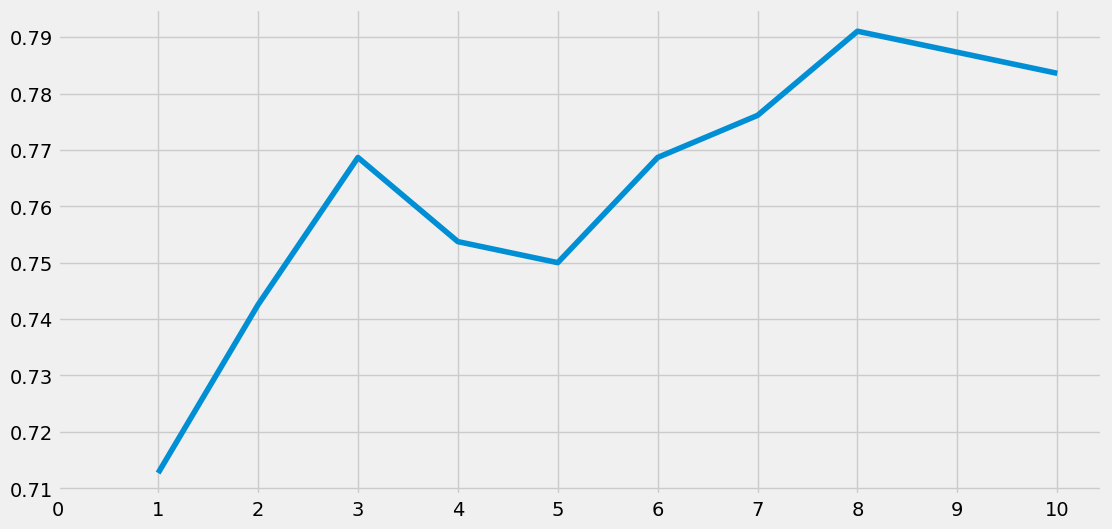

Accuracies for different values of n are: [0.71268657 0.74253731 0.76865672 0.75373134 0.75       0.76865672
 0.7761194  0.79104478 0.78731343 0.78358209] with the max value as 0.7910447761194029


In [48]:
# 測試不同鄰居數 (n_neighbors) 對於預測準確度的影響
a_index = list(range(1, 11))
a = pd.Series(dtype='float64')
x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for i in list(range(1, 11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    accuracy = pd.Series(metrics.accuracy_score(prediction, test_Y))
    a = pd.concat([a, accuracy], ignore_index=True)

plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()

print('Accuracies for different values of n are:', a.values, 'with the max value as', a.values.max())

### Gaussian Naive Bayes 高斯貝式
是基於貝葉斯定理的一種簡單但強大的分類器。其主要原理是根據特徵值的概率來估計不同類別的概率，然後選擇最可能的類別進行預測。朴素貝葉斯的關鍵假設是，“所有特徵都是相互條件獨立的”

In [49]:
model=GaussianNB()
model.fit(train_X,train_Y)
prediction6=model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.7835820895522388


In [50]:
model=RandomForestClassifier(n_estimators=100)
model.fit(train_X,train_Y)
prediction7=model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.7649253731343284


### 交叉驗證 Cross Validation
因為可能有模型變異的情況發生，為了克服為了克服這個問題，獲得通用模型，，我們需要交叉驗證

註：模型變異是指 -> 隨著訓練和測試資料的變化，準確性也會發生減少或增加的變化

In [51]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

#k=10； shuffle=True在分割數據前，將數據隨機打亂； random_state隨機數的種子
kfold = KFold(n_splits=10 , shuffle=True, random_state=66) 


# 初始化存放結果的容器
xyz=[] #每個模型的平均交叉驗證分數
std=[] #每個模型的分數標準差
accuracy=[] #每個模型在交叉驗證中的所有分數

#模型名稱
classifiers=['Linear Svm','rbf Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
#模型使用
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]



for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy") #計算模型在 K-fold 交叉驗證中的準確度。
    xyz.append(cv_result.mean()) #計算每個模型的平均準確度
    std.append(cv_result.std()) #計算每個模型準確度的標準差。
    accuracy.append(cv_result) #所有交叉驗證分數添加到 accuracy 列表。

# 將結果轉換為 DataFrame：
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.787965,0.045346
rbf Svm,0.827203,0.039712
Logistic Regression,0.808115,0.039511
KNN,0.818190,0.050914
Decision Tree,0.818190,0.063494
Naive Bayes,0.805880,0.041804
Random Forest,0.821536,0.052608


<Axes: >

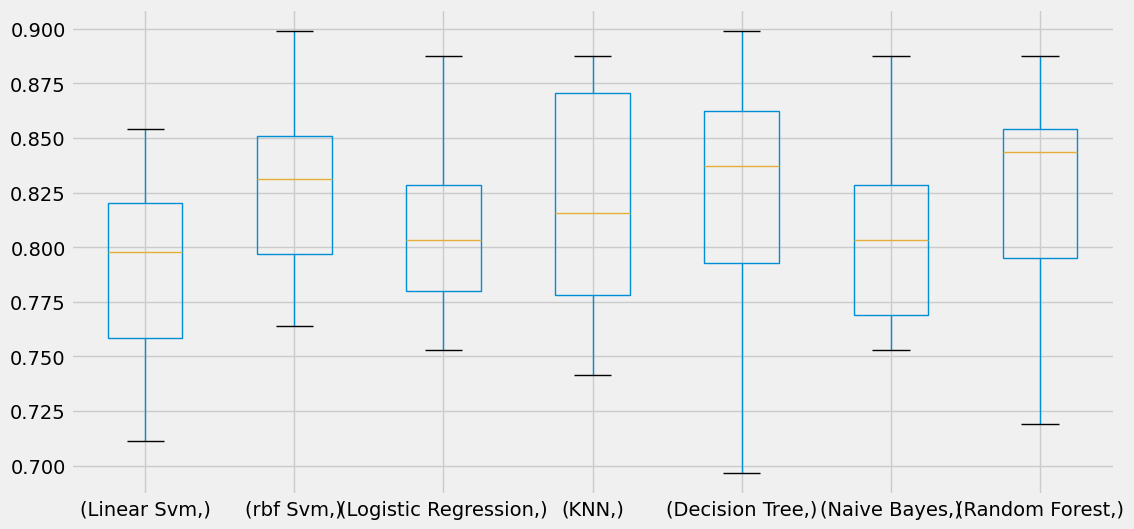

In [52]:
#各模型的 accuracy score
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()

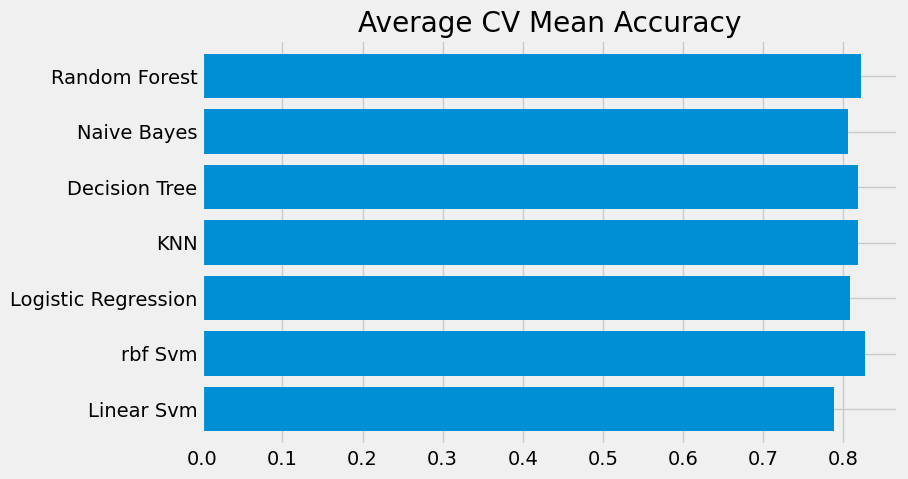

In [53]:
# 使用前面產生的 Dataframe(new_models_dataframe2)展示不同模型在交叉驗證中的平均準確度 (CV Mean)
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf() #選取當前整個圖形（通常是後面需要對整個圖形做設定）
fig.set_size_inches(8,5) #圖形的寬度為 8 英寸，高度為 5 英寸
plt.show()

## Confusion Matrix 混淆矩陣 
[[TN, FP],

[FN, TP]]
- 左對角線顯示每個類別正確預測的數量，而右對角線顯示錯誤預測的數量

- rbf-SVM 正確預測死亡乘客的機會更高，但 NaiveBayes 正確預測倖存乘客的機會更高。

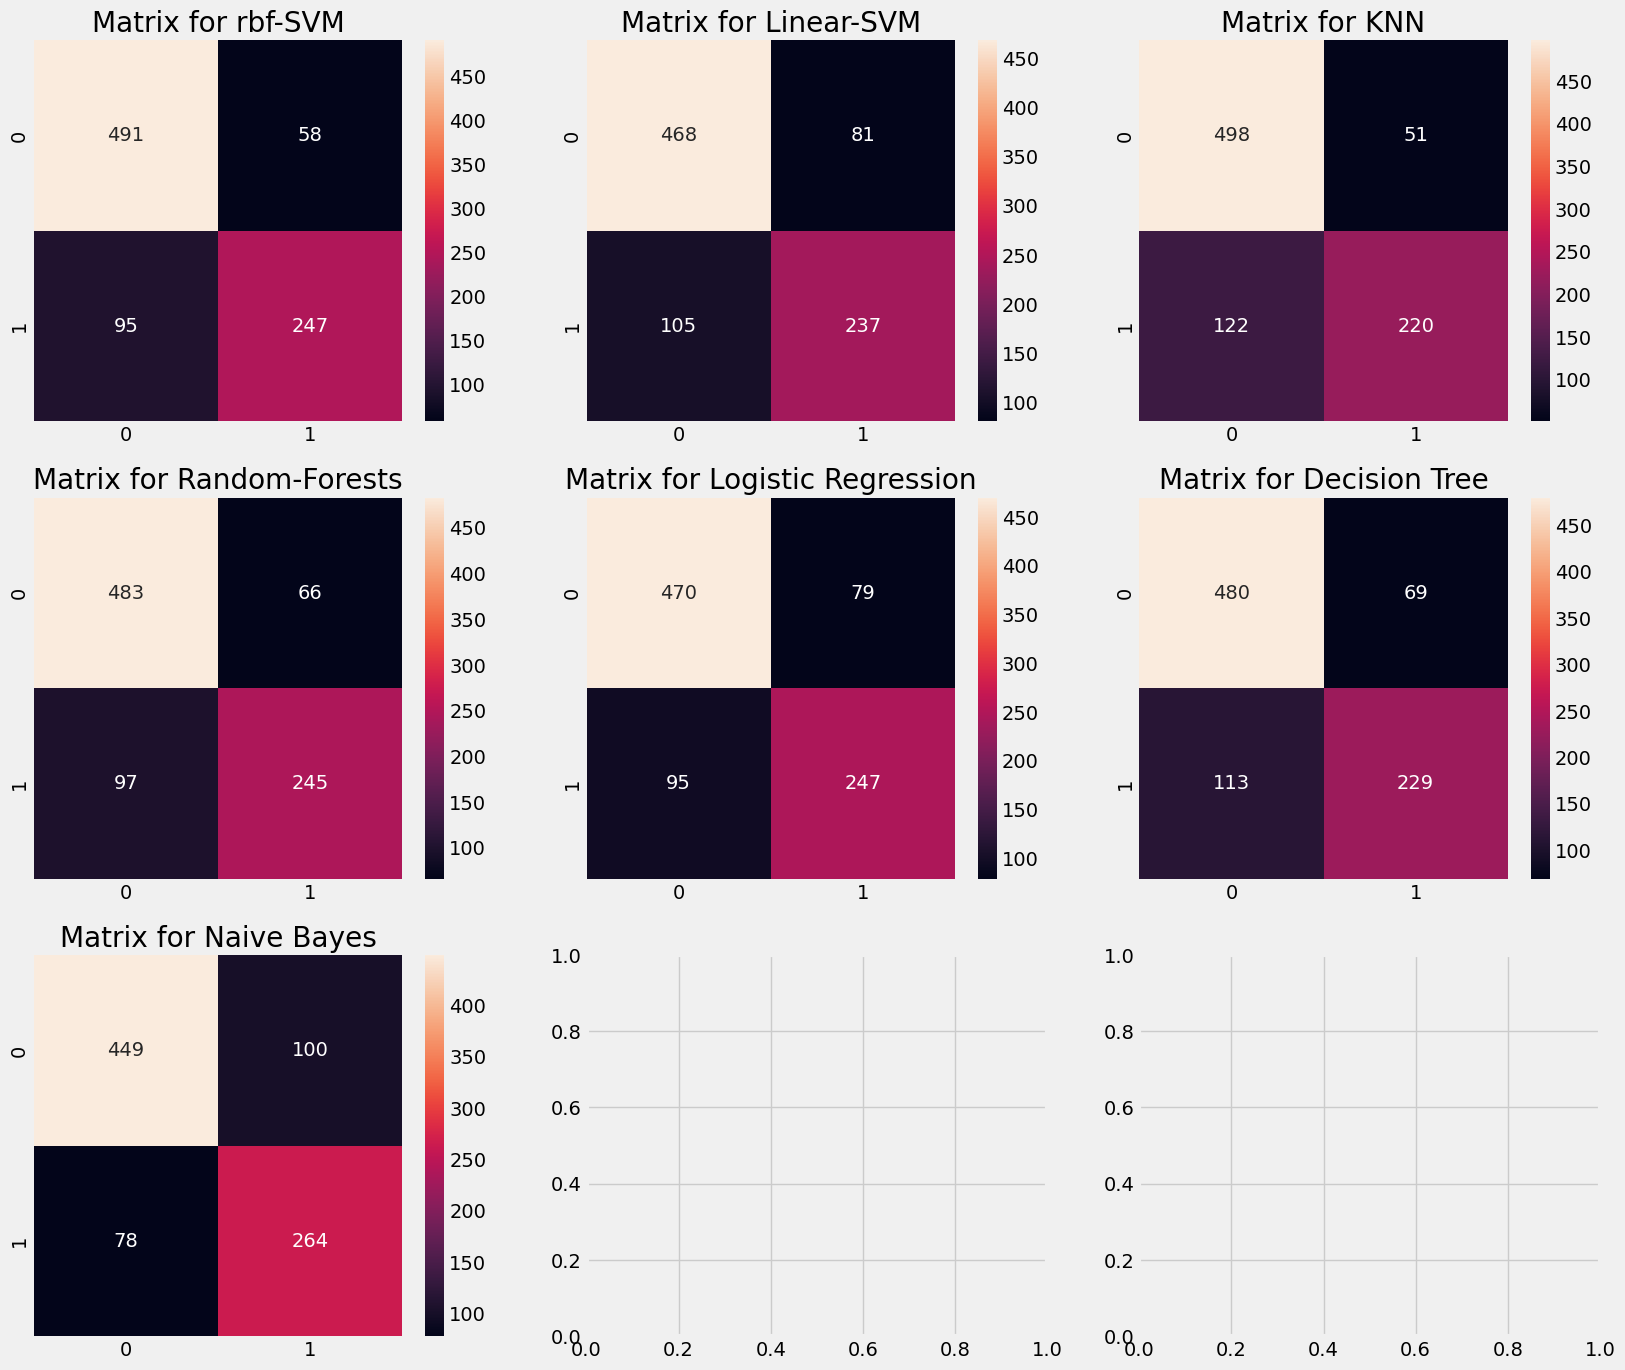

In [54]:
f,ax=plt.subplots(3,3,figsize=(18,16))

# SVM (RBF 核)
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10) #使用交叉驗證
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f') #製作熱力圖
ax[0,0].set_title('Matrix for rbf-SVM')

#SVM (線性核)
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')

# KNN (K=8)
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=8),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')

# 隨機森林
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')

# 邏輯回歸
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')

# 決策樹
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')

# Naive Bayes (高斯模型)
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')


plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()


# Hyper-Parameters Tuning 超參數調整
- C 是 SVM 的正則化參數，控制模型的罰則大小，用來避免過擬合或欠擬合。
- gamma 是 SVM 中非線性核函數（例如 RBF 核）的參數，控制高斯函數的範圍，對模型複雜度有影響。
- kernel 指定要使用的核函數類型

##### SVM

In [55]:
#SVM
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1] #懲罰項 (C越小可容忍更多錯誤，C越大模型越精準)
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0] #gamma 越小更廣泛的決策邊界，gamma 越大模型更專注在局部資料點上
kernel=['rbf','linear'] 
hyper={'kernel':kernel,'C':C,'gamma':gamma} #超參數字典

'''
GridSearchCV(estimator = 要使用的模型 , .............. )
param_grid=hyper 定義參數
verbose=True 會在執行時輸出詳細訊息
'''
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True) 

gd.fit(X,Y) #將資料 X 和標籤 Y 提供給 GridSearchCV 進行訓練
print(gd.best_score_) 
print(gd.best_estimator_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
0.8282593685267716
SVC(C=0.4, gamma=0.3)


#### Random Forests 隨機森林

In [56]:
n_estimators=range(100,1000,100) #從100到1000，以100做間隔
hyper={'n_estimators':n_estimators} #候選樹 的數量範圍

'''
GridSearchCV(estimator = 要使用的模型 , .............. )
random_state=0 保證了每次隨機結果的可重複性。
param_grid=hyper 表示參數範圍（即 n_estimators 的取值範圍）。
'''
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True) 


gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


KeyboardInterrupt: 

### Emsembling 集成 : 它是將各種簡單模型組合起來創建一個強大的模型。
 1. Voting Classifier 投票分類器
 2. Bagging 裝袋
 3. Boosting 提升

#### Voting Classifier 投票分類器
優勢：
- 提高模型的準確性：集成多個不同分類器的結果能夠減少單一分類器的誤差，通常能提高分類精度。
- 穩定性更強：即使某個基礎分類器表現不佳，其他分類器仍然可以幫助糾正錯誤，從而使最終結果更加穩定。
- 靈活性：可以將不同的分類器結合在一起，例如使用一個決策樹、一個隨機森林和一個支持向量機來組成投票分類器。

軟投票 : 是基於概率的投票方式。每個分類器不僅輸出預測結果，還會輸出每個類別的預測概率。這些概率會被平均，最終選擇具有最高平均概率的類別作為預測結果。

硬投票 : 硬投票是基於多數票決定的最終分類結果。它會將每個基礎分類器的預測當作一票，然後選擇預測次數最多的類別作為最終的預測結果。


In [281]:
from sklearn.ensemble import VotingClassifier

'''
KNeighborsClassifier : K-近鄰演算法，使用 n_neighbors=10。
SVC ('RBF') : 基於徑向基函式(RBF)核的支援向量機，C=0.5 和 gamma=0.1。
RandomForestClassifier : 隨機森林分類器，使用 500 棵樹(n_estimators=500)。
LogisticRegression : 邏輯迴歸模型，C=0.05 表示正則化強度。
DecisionTreeClassifier : 決策樹分類器，random_state=0 保證結果的可重現性。
GaussianNB : 樸素貝葉斯分類器。
SVC('svm'）：線性核的支援向量機，設定了 probability=True 來啟用軟投票模式。
'''
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=10)),
                                              ('RBF',svm.SVC(probability=True,kernel='rbf',C=0.5,gamma=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=500,random_state=0)),
                                              ('LR',LogisticRegression(C=0.05)),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('svm',svm.SVC(kernel='linear',probability=True))
                                             ], 
                       voting='soft').fit(train_X,train_Y)
# voting = 'soft' 表示使用軟投票，即每個分類器會根據預測的機率加權，並選擇機率最高的類別作為最終結果。
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(test_X,test_Y))
#投票分類器在測試集 test_X 和 test_Y 上的準確率。score 方法會計算模型的準確性，即模型對測試資料中正確預測的比例。

cross=cross_val_score(ensemble_lin_rbf,X,Y, cv = 10,scoring = "accuracy")
# cross_val_score：這個方法將資料集 X 和標籤 Y 分成 10 份，進行 10 次訓練-測試分割，每次用 9 份資料訓練模型，用剩下的 1 份資料測試模型，並重複這個過程 10 次。每次的準確率會被計算出來。

print('The cross validated score is',cross.mean())

# cross.mean()：計算這 10 次交叉驗證的準確率平均值。

The accuracy for ensembled model is: 0.7985074626865671
The cross validated score is 0.8249188514357055


## Bagging 裝袋
Bagging 是一種通用的整合方法。它的工作原理是在資料集的小分區上應用類似的分類器，然後取所有預測的平均值。由於平均，變異數減少了。與投票分類器不同，Bagging 使用類似的分類器。

#### Bagged KNN (袋裝KNN )
裝袋最適合高方差的模型。決策樹或隨機森林就是一個例子。我們可以使用n_neighbours值較小的 KNN。

In [282]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=3),random_state=0,n_estimators=700)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged KNN is:',result.mean())

The accuracy for bagged KNN is: 0.7910447761194029
The cross validated score for bagged KNN is: 0.8137952559300874


#### Bagged DecisionTree (袋裝決策樹)

In [283]:
model=BaggingClassifier(estimator=DecisionTreeClassifier(),random_state=0,n_estimators=100)
model.fit(train_X,train_Y)
prediction=model.predict(test_X)
print('The accuracy for bagged Decision Tree is:',metrics.accuracy_score(prediction,test_Y))
result=cross_val_score(model,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for bagged Decision Tree is:',result.mean())

The accuracy for bagged Decision Tree is: 0.7686567164179104
The cross validated score for bagged Decision Tree is: 0.8160174781523096


## Boosting 提升 
 是一種使用分類器的順序學習的整合技術。它是對弱模型的逐步增強。

 首先在完整的資料集上訓練模型。模型將得到一些正確的實例，而一些錯誤的實例。現在，在下一次迭代中，學習器將更專注於錯誤預測的實例或給予它更多的權重。因此它會嘗試正確預測錯誤的實例。這個迭代過程繼續進行，並將新的分類器添加到模型中，直到達到準確性的極限。

#### AdaBoost(Adaptive Boosting)  AdaBoost（自適應增強）

In [284]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.1)
result=cross_val_score(ada,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for AdaBoost is:',result.mean())

The cross validated score for AdaBoost is: 0.8249188514357055


#### Stochastic Gradient Boosting　隨機梯度提升

In [285]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.8115230961298376


#### XGBoost

In [286]:
pip install xgboost -q

Note: you may need to restart the kernel to use updated packages.


In [287]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
result=cross_val_score(xgboost,X,Y,cv=10,scoring='accuracy')
print('The cross validated score for XGBoost is:',result.mean())

The cross validated score for XGBoost is: 0.8160299625468165


### <span style="color:#0080FF;">  AdaBoost 為最高準確度，因此我們對它調整參數 </span>

In [288]:
n_estimators=list(range(100,1100,100))
learn_rate=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
0.8293892411022534
AdaBoostClassifier(learning_rate=0.1, n_estimators=100)


### 最佳模型的混淆矩陣

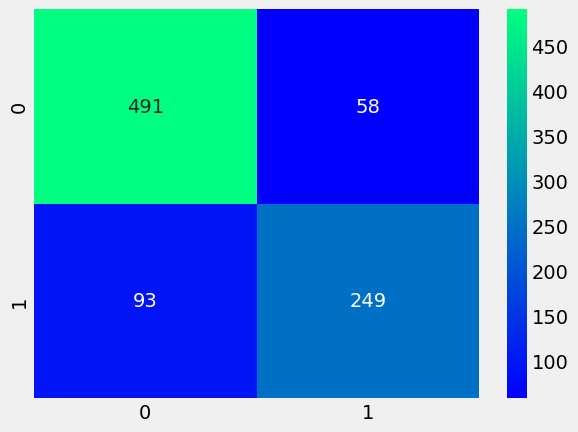

In [289]:
ada=AdaBoostClassifier(n_estimators=200,random_state=0,learning_rate=0.05)
result=cross_val_predict(ada,X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,result),cmap='winter',annot=True,fmt='2.0f')
plt.show()

### Feature Importance (特徵重要性)

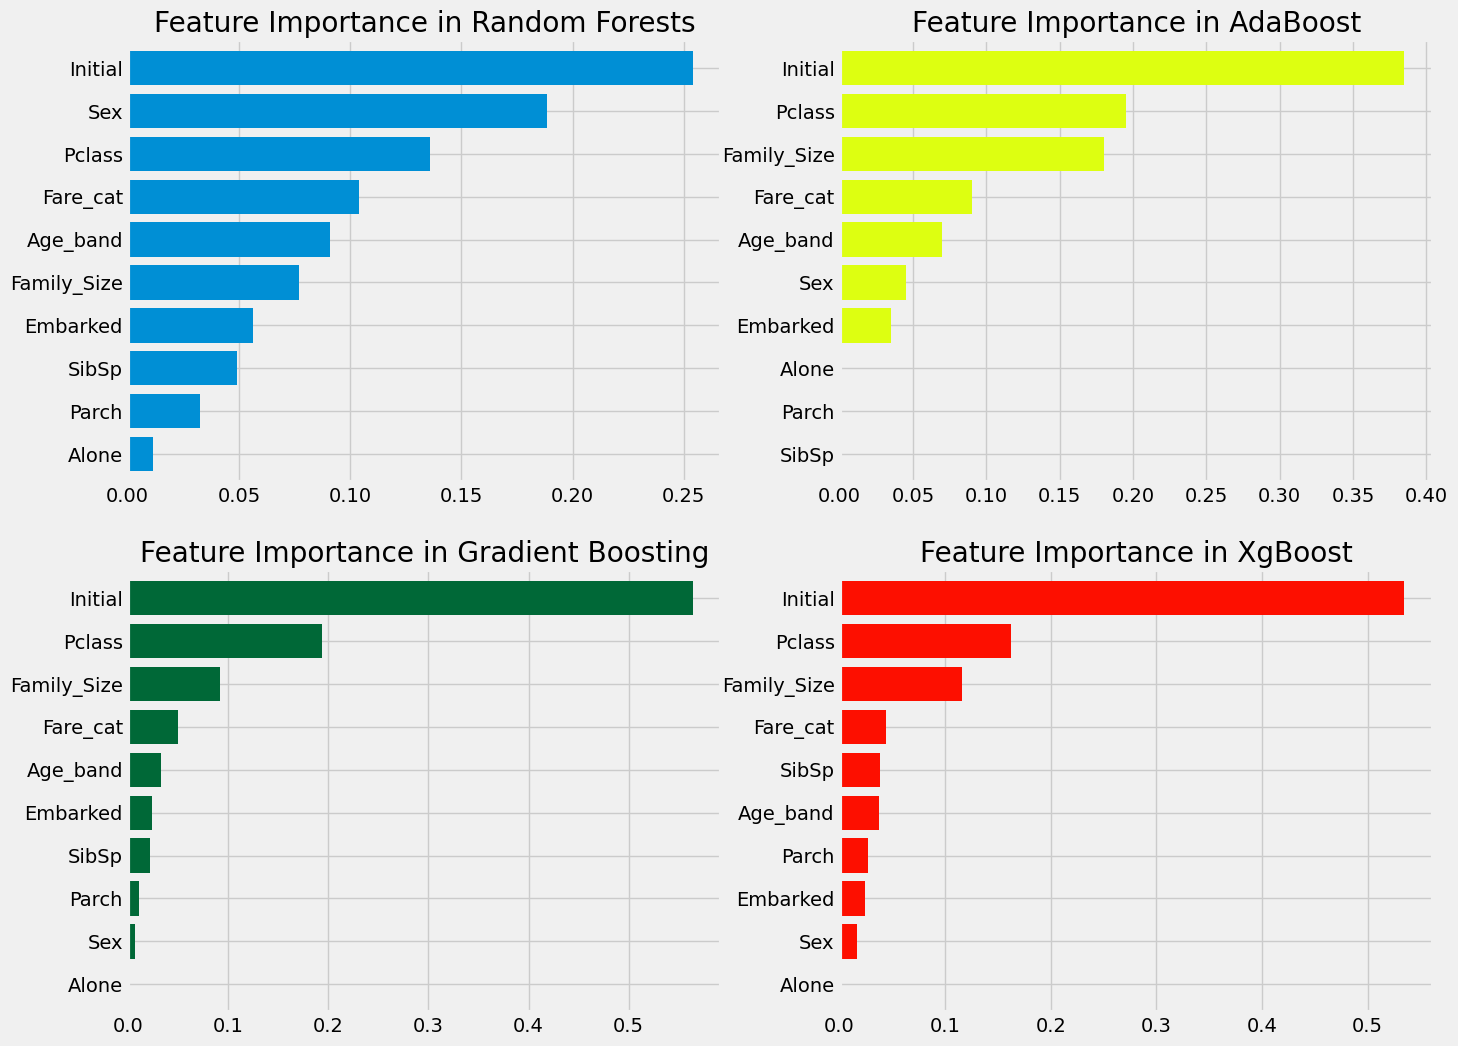

In [290]:
f,ax=plt.subplots(2,2,figsize=(15,12))

model=RandomForestClassifier(n_estimators=500,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier(n_estimators=200,learning_rate=0.05,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier(n_estimators=500,learning_rate=0.1,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
model.fit(X,Y)
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')


plt.show()

觀察： 
1. 一些常見的重要特徵是Initial、Fare_cat、Pclass、Family_Size。

2. 性別特徵似乎並沒有給出任何重要性，這令人震驚，因為我們之前已經看到性別與 Pclass 的結合提供了一個非常好的區分因素。性別似乎只在隨機森林中才重要。然而，我們可以看到Initial這個特徵，它在許多分類器中都位於頂部。

3. 類似地，Pclass 和 Fare_cat 指的是乘客的狀態，Family_Size 指的是 Alone、Parch 和 SibSp。